In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
url = 'https://github.com/hnrkljnsn/Assignment_1_machinelearning/blob/51886b078406ac11f347d390a7512c2e24707db0/AmesHousing.csv?raw=true'
data = pd.read_csv(url, index_col=0)

In [2]:
data.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
Order,,,,,,,,,,,,,,,,,,,,,
1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [3]:
missing_data = data.isnull().sum().sort_values(ascending=False)
missing_data[missing_data > 0]

Pool QC           2917
Misc Feature      2824
Alley             2732
Fence             2358
Fireplace Qu      1422
Lot Frontage       490
Garage Cond        159
Garage Finish      159
Garage Yr Blt      159
Garage Qual        159
Garage Type        157
Bsmt Exposure       83
BsmtFin Type 2      81
Bsmt Qual           80
Bsmt Cond           80
BsmtFin Type 1      80
Mas Vnr Area        23
Mas Vnr Type        23
Bsmt Half Bath       2
Bsmt Full Bath       2
BsmtFin SF 1         1
Garage Cars          1
Electrical           1
Total Bsmt SF        1
Bsmt Unf SF          1
BsmtFin SF 2         1
Garage Area          1
dtype: int64

In [4]:
cols_to_drop = ['Pool QC', 'Misc Feature', 'Alley', 'Fence', 'Fireplace Qu']
data_cleaned = data.drop(columns=cols_to_drop)

# Calculate missing values for categorical and numerical columns
data_cleaned['Lot Frontage'] = data_cleaned['Lot Frontage'].fillna(data_cleaned['Lot Frontage'].mean())
garage_cols_cat = ['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']
data_cleaned[garage_cols_cat] = data_cleaned[garage_cols_cat].fillna('None')

# Verify that there are no more missing values
data_cleaned.isnull().sum().sort_values(ascending=False).head()

Garage Yr Blt     159
Bsmt Exposure      83
BsmtFin Type 2     81
BsmtFin Type 1     80
Bsmt Qual          80
dtype: int64

In [5]:
# Select numeric features and compute correlation with sales price
numeric_features = data_cleaned.select_dtypes(include=[float, int])
correlation_matrix = numeric_features.corr()
correlation_with_target = correlation_matrix['SalePrice'].sort_values(ascending=False)

# Display the top correlated features
correlation_with_target.head(15)

SalePrice         1.000000
Overall Qual      0.799262
Gr Liv Area       0.706780
Garage Cars       0.647877
Garage Area       0.640401
Total Bsmt SF     0.632280
1st Flr SF        0.621676
Year Built        0.558426
Full Bath         0.545604
Year Remod/Add    0.532974
Garage Yr Blt     0.526965
Mas Vnr Area      0.508285
TotRms AbvGrd     0.495474
Fireplaces        0.474558
BsmtFin SF 1      0.432914
Name: SalePrice, dtype: float64

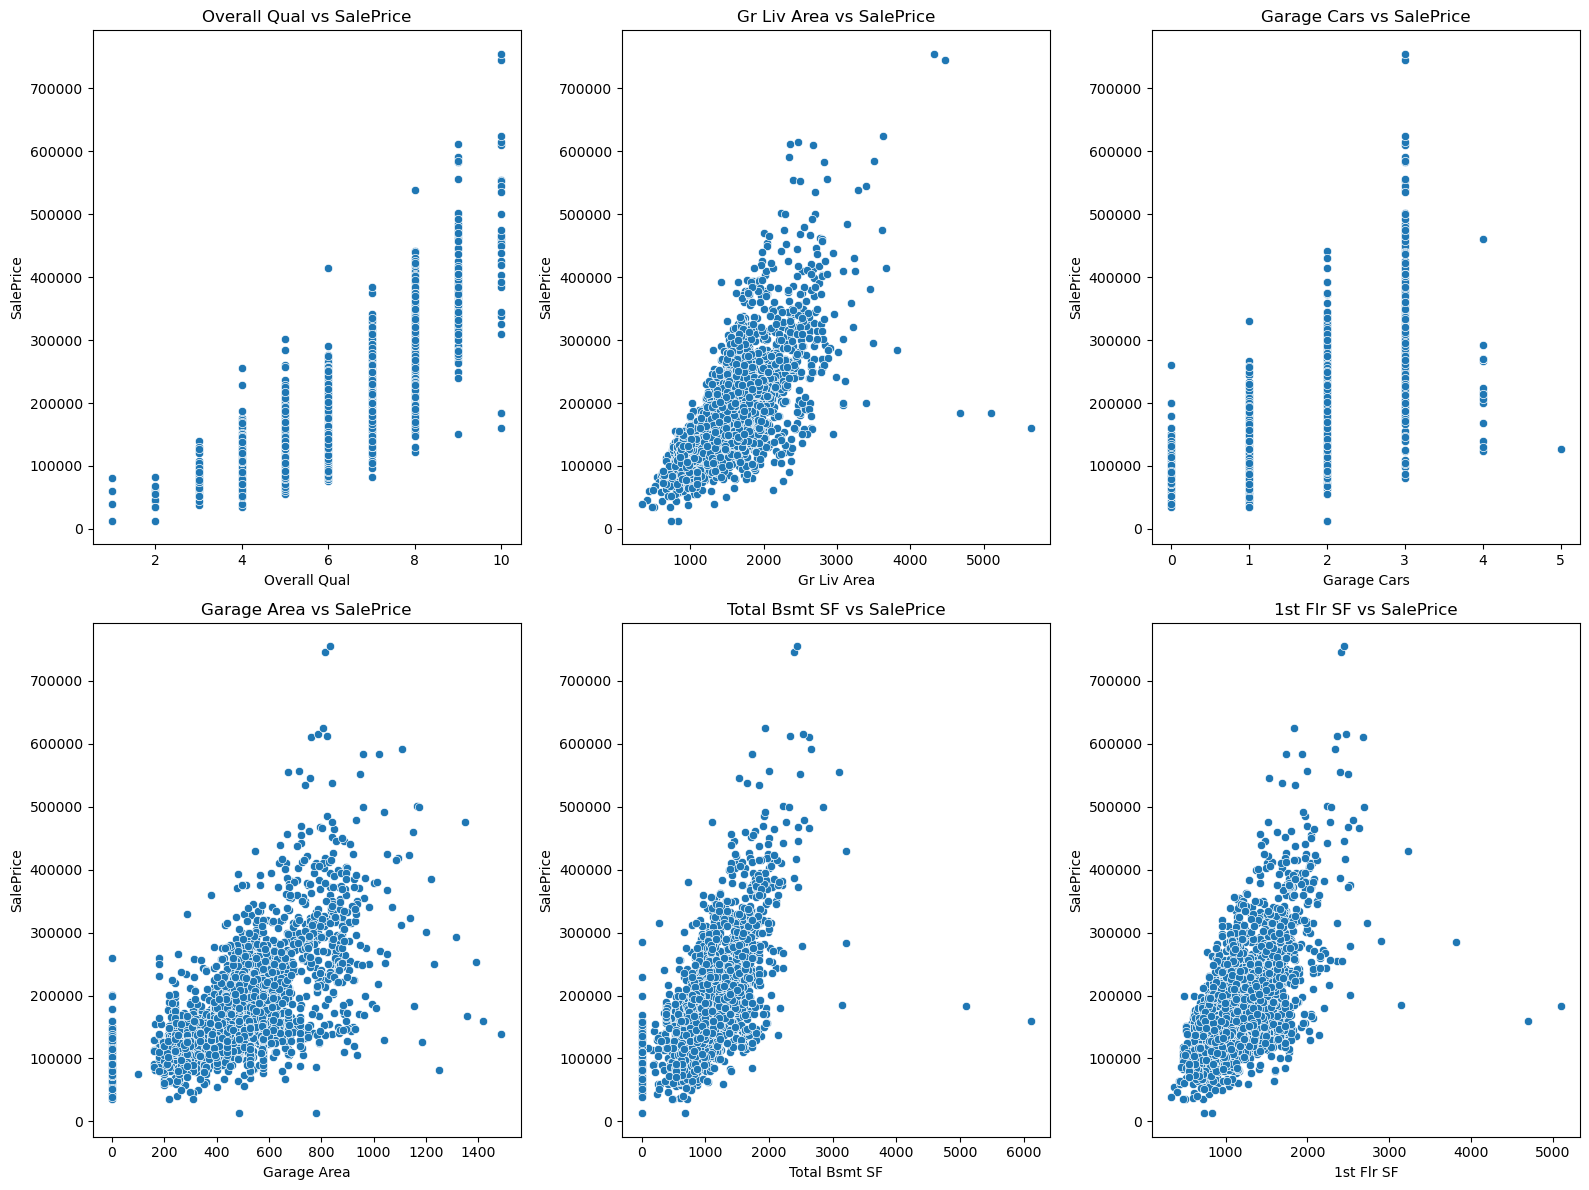

In [6]:
top_features = ['Overall Qual', 'Gr Liv Area', 'Garage Cars', 'Garage Area', 'Total Bsmt SF', '1st Flr SF']

plt.figure(figsize=(16, 12))
for i, feature in enumerate(top_features, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=data_cleaned[feature], y=data_cleaned['SalePrice'])
    plt.title(f"{feature} vs SalePrice")
plt.tight_layout()
plt.show()

In [7]:
# Check for any remaining missing values in the dataset
print(data_cleaned.isnull().sum().sort_values(ascending=False).head(10))

Garage Yr Blt     159
Bsmt Exposure      83
BsmtFin Type 2     81
BsmtFin Type 1     80
Bsmt Qual          80
Bsmt Cond          80
Mas Vnr Area       23
Mas Vnr Type       23
Bsmt Full Bath      2
Bsmt Half Bath      2
dtype: int64


In [8]:
# Drop rows with any missing values in the features
data_cleaned = data_cleaned.dropna()

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Select features and split
features = ['Overall Qual', 'Gr Liv Area', 'Garage Cars', 'Garage Area', 'Total Bsmt SF', '1st Flr SF', 'Year Built']
X = data_cleaned[features]
y = data_cleaned['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# Polynomial Regression
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)
y_pred_poly = poly_model.predict(X_poly_test)

# Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [10]:
# Evaluate Linear Regression
linear_mse = mean_squared_error(y_test, y_pred_linear)
linear_r2 = r2_score(y_test, y_pred_linear)

# Evaluate Polynomial Regression
poly_mse = mean_squared_error(y_test, y_pred_poly)
poly_r2 = r2_score(y_test, y_pred_poly)

# Evaluate Random Forest
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)

# Create a summary DataFrame
results = {
    "Model": ["Linear Regression", "Polynomial Regression", "Random Forest Regressor"],
    "MSE": [linear_mse, poly_mse, rf_mse],
    "R-squared": [linear_r2, poly_r2, rf_r2]
}

results_df = pd.DataFrame(results)
results_df

,Model,MSE,R-squared
0,Linear Regression,1.186592e+09,0.817019
1,Polynomial Regression,7.868291e+08,0.878666
2,Random Forest Regressor,7.880184e+08,0.878482
